# 1.Importing Libraries

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')
# Libraries to help with reading and manipulating data
import seaborn as sns
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': '{:g}'.format})

#  2. Data loading and overview

In [2]:
df_ins = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
#Check the info of the data set which describes null values, data type, memory usage
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [4]:
df_ins.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [5]:
# Give number of row and coloums
print('Total Row ',df_ins.shape[0],'& Coloumn ', df_ins.shape[1])

Total Row  10000 & Coloumn  19


# 3. Exploratory Data Analysis
##### In this segment, we'll engage in fundamental Exploratory Data Analysis to gain an intuitive understanding of the data. We'll examine distributions, correlations, and other characteristics across various columns.

In [6]:
# Check for duplicates
print(df_ins.duplicated())

# Remove duplicates if any
df_ins = df_ins.drop_duplicates()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


# 3.1 Missing Data
##### Using Seaborn, we can produce a basic heatmap to visually pinpoint areas with missing data. Alternatively, another method to identify missing data is by employing descriptive statistics or pandas functions, such as isnull() and sum(), to highlight the presence of null values in the dataset.!

###### Check for 'NaN' (missing values) totals calculate the percentage of missing values in each column
##### Remove rows with missing values

In [7]:
# Check for any missing value in columns
df_ins.isna().any()
# Calculate the percentage of missing values in each column
for col in df_ins.columns:
    missing_values = df_ins[col].isna().sum()
    percentage = (missing_values / len(df_ins)) * 100
    print(f"Percentage of missing values in {col}: {percentage:.2f}%")

Percentage of missing values in ID: 0.00%
Percentage of missing values in AGE: 0.00%
Percentage of missing values in GENDER: 0.00%
Percentage of missing values in RACE: 0.00%
Percentage of missing values in DRIVING_EXPERIENCE: 0.00%
Percentage of missing values in EDUCATION: 0.00%
Percentage of missing values in INCOME: 0.00%
Percentage of missing values in CREDIT_SCORE: 9.82%
Percentage of missing values in VEHICLE_OWNERSHIP: 0.00%
Percentage of missing values in VEHICLE_YEAR: 0.00%
Percentage of missing values in MARRIED: 0.00%
Percentage of missing values in CHILDREN: 0.00%
Percentage of missing values in POSTAL_CODE: 0.00%
Percentage of missing values in ANNUAL_MILEAGE: 9.57%
Percentage of missing values in VEHICLE_TYPE: 0.00%
Percentage of missing values in SPEEDING_VIOLATIONS: 0.00%
Percentage of missing values in DUIS: 0.00%
Percentage of missing values in PAST_ACCIDENTS: 0.00%
Percentage of missing values in OUTCOME: 0.00%


In [8]:
#missing data
df_ins.isnull().sum().sort_values(ascending=False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

In [9]:
# Give number of row and coloums
print('Total Row before removing duplicate ',df_ins.shape[0],'& Coloumn ', df_ins.shape[1])
# Remove rows with missing values
df_ins.dropna(inplace=True)
# Give number of row and coloums
print('Total Row after removing duplicate ',df_ins.shape[0],'& Coloumn ', df_ins.shape[1])

Total Row before removing duplicate  10000 & Coloumn  19
Total Row after removing duplicate  8149 & Coloumn  19


## Renaming all Column names more user friendly

In [10]:
df_ins.rename(columns={'ID': 'person_id'}, inplace = True)
df_ins.rename(columns={'AGE': 'age_range'}, inplace = True)
df_ins.rename(columns={'GENDER': 'gender'}, inplace = True)
df_ins.rename(columns={'RACE': 'majority_minority'}, inplace = True)
df_ins.rename(columns={'DRIVING_EXPERIENCE': 'driving_experience_years'}, inplace = True)
df_ins.rename(columns={'EDUCATION': 'education'}, inplace = True)
df_ins.rename(columns={'INCOME': 'income'}, inplace = True)
df_ins.rename(columns={'CREDIT_SCORE': 'credit_score'}, inplace = True)
df_ins.rename(columns={'VEHICLE_OWNERSHIP': 'vehicle_ownership'}, inplace = True)
df_ins.rename(columns={'VEHICLE_YEAR': 'vehicle_year_after_2015'}, inplace = True)
df_ins.rename(columns={'MARRIED': 'married'}, inplace = True)
df_ins.rename(columns={'CHILDREN': 'children'}, inplace = True)
df_ins.rename(columns={'POSTAL_CODE': 'postal_code'}, inplace = True)
df_ins.rename(columns={'ANNUAL_MILEAGE': 'annual_mileage'}, inplace = True)
df_ins.rename(columns={'VEHICLE_TYPE': 'vehicle_type'}, inplace = True)
df_ins.rename(columns={'SPEEDING_VIOLATIONS': 'speeding_violations'}, inplace = True)
df_ins.rename(columns={'DUIS': 'duis'}, inplace = True)
df_ins.rename(columns={'PAST_ACCIDENTS': 'past_accidents'}, inplace = True)
df_ins.rename(columns={'OUTCOME': 'outcome'}, inplace = True)

In [11]:
# Check what type of data are in this columns
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   person_id                 8149 non-null   int64  
 1   age_range                 8149 non-null   object 
 2   gender                    8149 non-null   object 
 3   majority_minority         8149 non-null   object 
 4   driving_experience_years  8149 non-null   object 
 5   education                 8149 non-null   object 
 6   income                    8149 non-null   object 
 7   credit_score              8149 non-null   float64
 8   vehicle_ownership         8149 non-null   float64
 9   vehicle_year_after_2015   8149 non-null   object 
 10  married                   8149 non-null   float64
 11  children                  8149 non-null   float64
 12  postal_code               8149 non-null   int64  
 13  annual_mileage            8149 non-null   float64
 14  vehicle_type 

## Give values more user friendly names
###  (Some work Commented out)

In [12]:
#driving experience years values
df_ins.loc[df_ins['driving_experience_years'] ==  '0-9y','driving_experience_years']     = '0-9'
df_ins.loc[df_ins['driving_experience_years'] ==  '10-19y','driving_experience_years']   = '10-19'
df_ins.loc[df_ins['driving_experience_years'] ==  '20-29y','driving_experience_years']   = '20-29'
df_ins.loc[df_ins['driving_experience_years'] ==  '30y+','driving_experience_years']     = '30+'

In [13]:
#change "after 2015" to "True"
df_ins.loc[df_ins['vehicle_year_after_2015'] ==  'after 2015','vehicle_year_after_2015']   = 'True'

#change "before 2015" to "False"
df_ins.loc[df_ins['vehicle_year_after_2015'] ==  'before 2015','vehicle_year_after_2015']   = 'False'

In [14]:
df_ins.head(3)
print('vehicle_year_after_2015 :', df_ins.vehicle_year_after_2015.value_counts())



vehicle_year_after_2015 : vehicle_year_after_2015
False    5642
True     2507
Name: count, dtype: int64


## Changing the datatypes of fields

In [15]:
# changing float data type to integer
df_ins['children']          = df_ins['children'].astype('int64')
df_ins['vehicle_ownership'] = df_ins['vehicle_ownership'].astype('int64')
df_ins['married']           = df_ins['married'].astype('int64')
df_ins['outcome']           = df_ins['outcome'].astype('int64')
df_ins['annual_mileage']    = df_ins['annual_mileage'].astype('int64')

#change datatype of field to boolean
df_ins['vehicle_year_after_2015'] = df_ins['vehicle_year_after_2015'].astype('bool')


#age_range object to Categorical
#df_ins['age_range'] = df_ins['age_range'].astype('int64')
#driving experience years object -to- category
df_ins['driving_experience_years'] = df_ins['driving_experience_years'].astype('category')

#df_ins['vehicle_id'] = df_ins['vehicle_id'].astype('int64') 

In [16]:
df_ins.dtypes

person_id                      int64
age_range                     object
gender                        object
majority_minority             object
driving_experience_years    category
education                     object
income                        object
credit_score                 float64
vehicle_ownership              int64
vehicle_year_after_2015         bool
married                        int64
children                       int64
postal_code                    int64
annual_mileage                 int64
vehicle_type                  object
speeding_violations            int64
duis                           int64
past_accidents                 int64
outcome                        int64
dtype: object

In [17]:
#df_ins['person_id'] = df_ins.loc[:,'vehicle_id']

df_ins.head(5)

,person_id,age_range,gender,majority_minority,driving_experience_years,education,income,credit_score,vehicle_ownership,vehicle_year_after_2015,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,female,majority,0-9,high school,upper class,0.629027,1,True,0,1,10238,12000,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9,none,poverty,0.357757,0,True,0,0,10238,16000,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9,high school,working class,0.493146,1,True,0,0,10238,11000,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9,university,working class,0.206013,1,True,0,1,32765,11000,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19,none,working class,0.388366,1,True,0,0,32765,12000,sedan,2,0,1,1


In [18]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   person_id                 8149 non-null   int64   
 1   age_range                 8149 non-null   object  
 2   gender                    8149 non-null   object  
 3   majority_minority         8149 non-null   object  
 4   driving_experience_years  8149 non-null   category
 5   education                 8149 non-null   object  
 6   income                    8149 non-null   object  
 7   credit_score              8149 non-null   float64 
 8   vehicle_ownership         8149 non-null   int64   
 9   vehicle_year_after_2015   8149 non-null   bool    
 10  married                   8149 non-null   int64   
 11  children                  8149 non-null   int64   
 12  postal_code               8149 non-null   int64   
 13  annual_mileage            8149 non-null   int64   
 1

In [19]:
df_ins.head(5)

,person_id,age_range,gender,majority_minority,driving_experience_years,education,income,credit_score,vehicle_ownership,vehicle_year_after_2015,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,female,majority,0-9,high school,upper class,0.629027,1,True,0,1,10238,12000,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9,none,poverty,0.357757,0,True,0,0,10238,16000,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9,high school,working class,0.493146,1,True,0,0,10238,11000,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9,university,working class,0.206013,1,True,0,1,32765,11000,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19,none,working class,0.388366,1,True,0,0,32765,12000,sedan,2,0,1,1


### Details of each column and data type

In [20]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   person_id                 8149 non-null   int64   
 1   age_range                 8149 non-null   object  
 2   gender                    8149 non-null   object  
 3   majority_minority         8149 non-null   object  
 4   driving_experience_years  8149 non-null   category
 5   education                 8149 non-null   object  
 6   income                    8149 non-null   object  
 7   credit_score              8149 non-null   float64 
 8   vehicle_ownership         8149 non-null   int64   
 9   vehicle_year_after_2015   8149 non-null   bool    
 10  married                   8149 non-null   int64   
 11  children                  8149 non-null   int64   
 12  postal_code               8149 non-null   int64   
 13  annual_mileage            8149 non-null   int64   
 1

In [21]:
#df_ins.info()
df_ins.dtypes

person_id                      int64
age_range                     object
gender                        object
majority_minority             object
driving_experience_years    category
education                     object
income                        object
credit_score                 float64
vehicle_ownership              int64
vehicle_year_after_2015         bool
married                        int64
children                       int64
postal_code                    int64
annual_mileage                 int64
vehicle_type                  object
speeding_violations            int64
duis                           int64
past_accidents                 int64
outcome                        int64
dtype: object

In [22]:
df_ins.columns

Index(['person_id', 'age_range', 'gender', 'majority_minority',
       'driving_experience_years', 'education', 'income', 'credit_score',
       'vehicle_ownership', 'vehicle_year_after_2015', 'married', 'children',
       'postal_code', 'annual_mileage', 'vehicle_type', 'speeding_violations',
       'duis', 'past_accidents', 'outcome'],
      dtype='object')

### 3.2 Data Exploration

In [23]:
df_ins['driving_experience_years'].unique() 

['0-9', '10-19', '20-29', '30+']
Categories (4, object): ['0-9', '10-19', '20-29', '30+']

In [24]:
# Check for number of major_minority  in data set
print(' Sum of married :', df_ins.married.value_counts())

# Check for number of loan claimed  in data set
print(' Sum of outcome :', df_ins.outcome.value_counts())

#Check for number customer in each age group 
print(' Sum of Age group :', df_ins.age_range.value_counts())

#
print(' Sum of driving  :', df_ins.driving_experience_years.value_counts())
# Gender
print(' Sum of Gender  :', df_ins.gender.value_counts())

# OUTCOME
print(' Outcome  :', df_ins.outcome.value_counts())

# Vehicle ownership
print('vehicle_ownership :', df_ins.vehicle_ownership.value_counts())

print('vehicle_year_after_2015 :', df_ins.vehicle_year_after_2015.value_counts())


 Sum of married : married
1    4083
0    4066
Name: count, dtype: int64
 Sum of outcome : outcome
0    5613
1    2536
Name: count, dtype: int64
 Sum of Age group : age_range
26-39    2475
40-64    2412
65+      1641
16-25    1621
Name: count, dtype: int64
 Sum of driving  : driving_experience_years
0-9      2864
10-19    2662
20-29    1756
30+       867
Name: count, dtype: int64
 Sum of Gender  : gender
female    4084
male      4065
Name: count, dtype: int64
 Outcome  : outcome
0    5613
1    2536
Name: count, dtype: int64
vehicle_ownership : vehicle_ownership
1    5698
0    2451
Name: count, dtype: int64
vehicle_year_after_2015 : vehicle_year_after_2015
True    8149
Name: count, dtype: int64


In [25]:
dont_claim_loan = len(df_ins[df_ins.outcome  == 1]) # Total number person claim loan
claim_loan      = len(df_ins[df_ins.outcome  == 0])  #  Total number person not claim loan

print("Percentage of people who apply for a loan: {:.2f}%".format((dont_claim_loan / (len(df_ins.outcome))*100)))
print("Percentage of people who did not apply for a loan: {:.2f}%".format((claim_loan / (len(df_ins.outcome))*100)))


Percentage of people who apply for a loan: 31.12%
Percentage of people who did not apply for a loan: 68.88%


In [26]:
df_ins.head(5)

,person_id,age_range,gender,majority_minority,driving_experience_years,education,income,credit_score,vehicle_ownership,vehicle_year_after_2015,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,female,majority,0-9,high school,upper class,0.629027,1,True,0,1,10238,12000,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9,none,poverty,0.357757,0,True,0,0,10238,16000,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9,high school,working class,0.493146,1,True,0,0,10238,11000,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9,university,working class,0.206013,1,True,0,1,32765,11000,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19,none,working class,0.388366,1,True,0,0,32765,12000,sedan,2,0,1,1


In [27]:
df_ins['speeding_violations'].unique() 
#print(' Sum of speeding_violations  :', df_ins.speeding_violations.value_counts())

array([ 0,  2,  3,  7,  6,  4, 13,  1,  5, 10,  9,  8, 11, 12, 15, 17, 19,
       18, 16, 14, 22], dtype=int64)

###  Data Distribution related to outcome

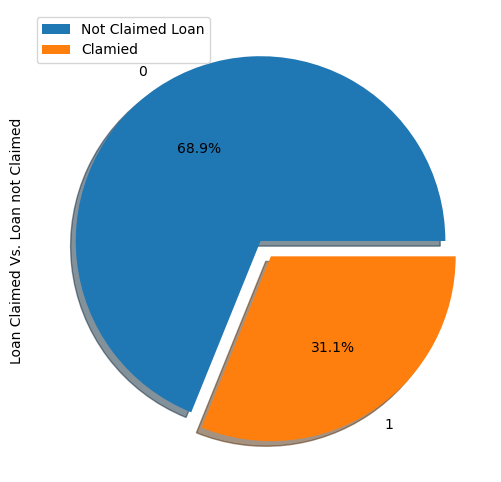

In [28]:
def show_outcome_distrib(data):
    count = data["outcome"].value_counts() if isinstance(data, pd.DataFrame) else data.value_counts()

    count.plot.pie(explode=[0, 0.1], figsize=(6, 6), autopct='%1.1f%%', shadow=True)
    plt.ylabel("Loan Claimed Vs. Loan not Claimed")
    plt.legend(["Not Claimed Loan","Clamied"])
    plt.show()


# Visualize the proportion of borrowers
show_outcome_distrib(df_ins)

#### Female Vs. Male data distribution

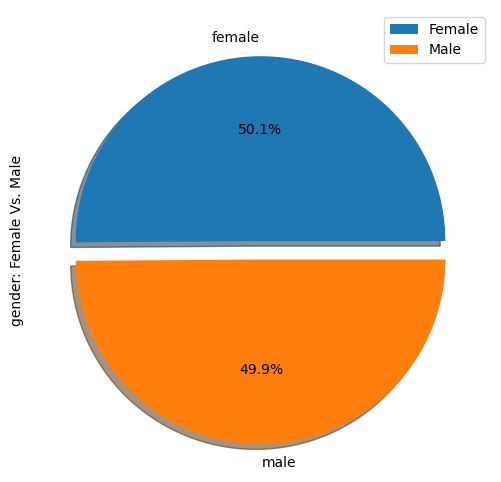

In [29]:
# Helper function for data distribution
# Visualize the proportion of Outcome
def show_gender_distrib(data):
    count = data["gender"].value_counts() if isinstance(data, pd.DataFrame) else data.value_counts()

    count.plot.pie(explode=[0, 0.1], figsize=(6, 6), autopct='%1.1f%%', shadow=True)
    plt.ylabel("gender: Female Vs. Male")
    plt.legend(["Female","Male"])
    plt.show()


# Visualize the proportion of borrowers
show_gender_distrib(df_ins)

#### Martial Status: Married Vs. Single data distribution

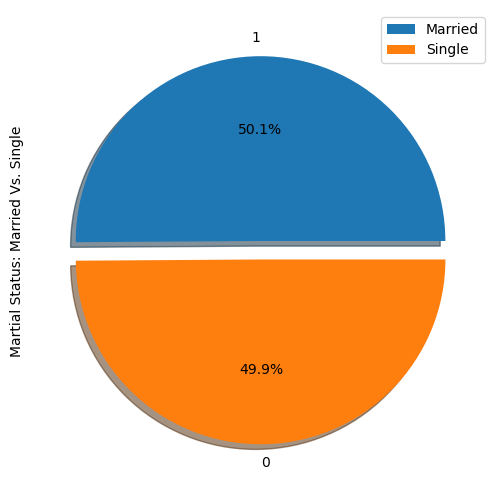

In [30]:
# Helper function for data distribution
def show_married_distrib(data):
    count = data["married"].value_counts() if isinstance(data, pd.DataFrame) else data.value_counts()

    count.plot.pie(explode=[0, 0.1], figsize=(6, 6), autopct='%1.1f%%', shadow=True)
    plt.ylabel("Martial Status: Married Vs. Single")
    plt.legend(["Married","Single"])
    plt.show()


# Visualize the proportion of borrowers
show_married_distrib(df_ins)

In [31]:
df_ins.age_range

0         65+
1       16-25
2       16-25
3       16-25
4       26-39
        ...  
9994    26-39
9995    26-39
9997    26-39
9998    26-39
9999    26-39
Name: age_range, Length: 8149, dtype: object

In [32]:
df_ins.dtypes

person_id                      int64
age_range                     object
gender                        object
majority_minority             object
driving_experience_years    category
education                     object
income                        object
credit_score                 float64
vehicle_ownership              int64
vehicle_year_after_2015         bool
married                        int64
children                       int64
postal_code                    int64
annual_mileage                 int64
vehicle_type                  object
speeding_violations            int64
duis                           int64
past_accidents                 int64
outcome                        int64
dtype: object

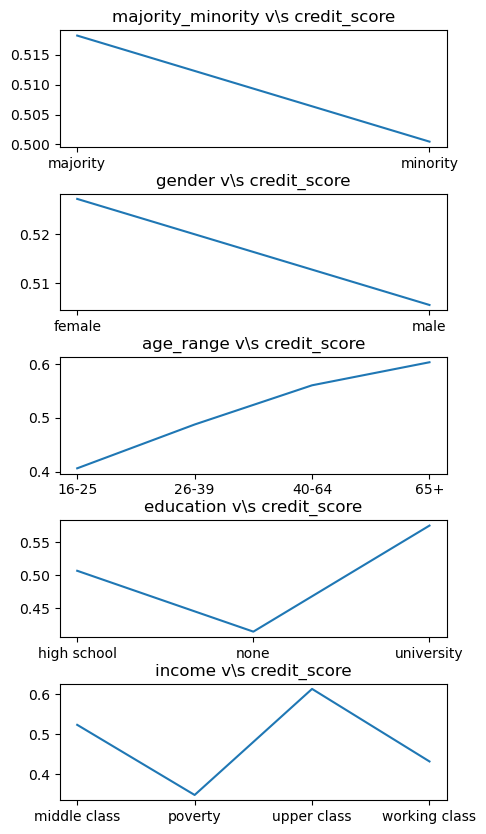

In [33]:
fig,ax = plt.subplots(nrows=5,ncols = 1,figsize=(5,10))
plt.subplots_adjust(wspace=0.5,hspace=0.4)
i=0
for ft in ['majority_minority','gender','age_range','education','income']:
    ax[i].plot(df_ins.groupby(ft).credit_score.mean())
    ax[i].set_title(f'{ft} v\s credit_score')
    i+=1

In [34]:
df_ins.dtypes

person_id                      int64
age_range                     object
gender                        object
majority_minority             object
driving_experience_years    category
education                     object
income                        object
credit_score                 float64
vehicle_ownership              int64
vehicle_year_after_2015         bool
married                        int64
children                       int64
postal_code                    int64
annual_mileage                 int64
vehicle_type                  object
speeding_violations            int64
duis                           int64
past_accidents                 int64
outcome                        int64
dtype: object

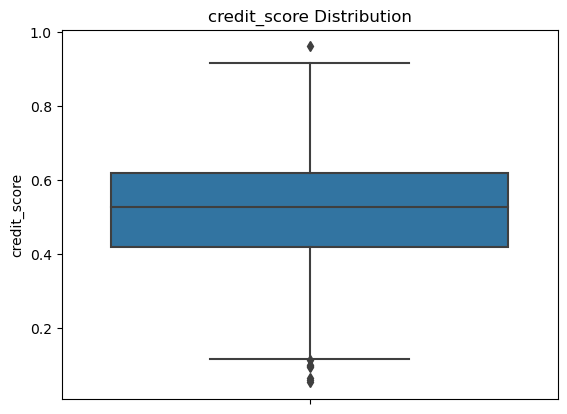

In [35]:
df_ins.columns
#df_ins.info()
sns.boxplot(y='credit_score', data=df_ins)
plt.ylabel('credit_score')
plt.title('credit_score Distribution')
plt.show()

In [36]:
print('Age Count : ',df_ins['age_range'].value_counts())
grouped_data = df_ins.groupby(['age_range', 'gender', 'outcome'])['outcome'].count().unstack()
print('Count based on age gender and outcome .\n')
grouped_data

Age Count :  age_range
26-39    2475
40-64    2412
65+      1641
16-25    1621
Name: count, dtype: int64
Count based on age gender and outcome .



outcome              0    1
age_range gender           
16-25     female   291  553
          male     172  605
26-39     female   890  330
          male     750  505
40-64     female  1053  140
          male     981  238
65+       female   765   62
          male     711  103

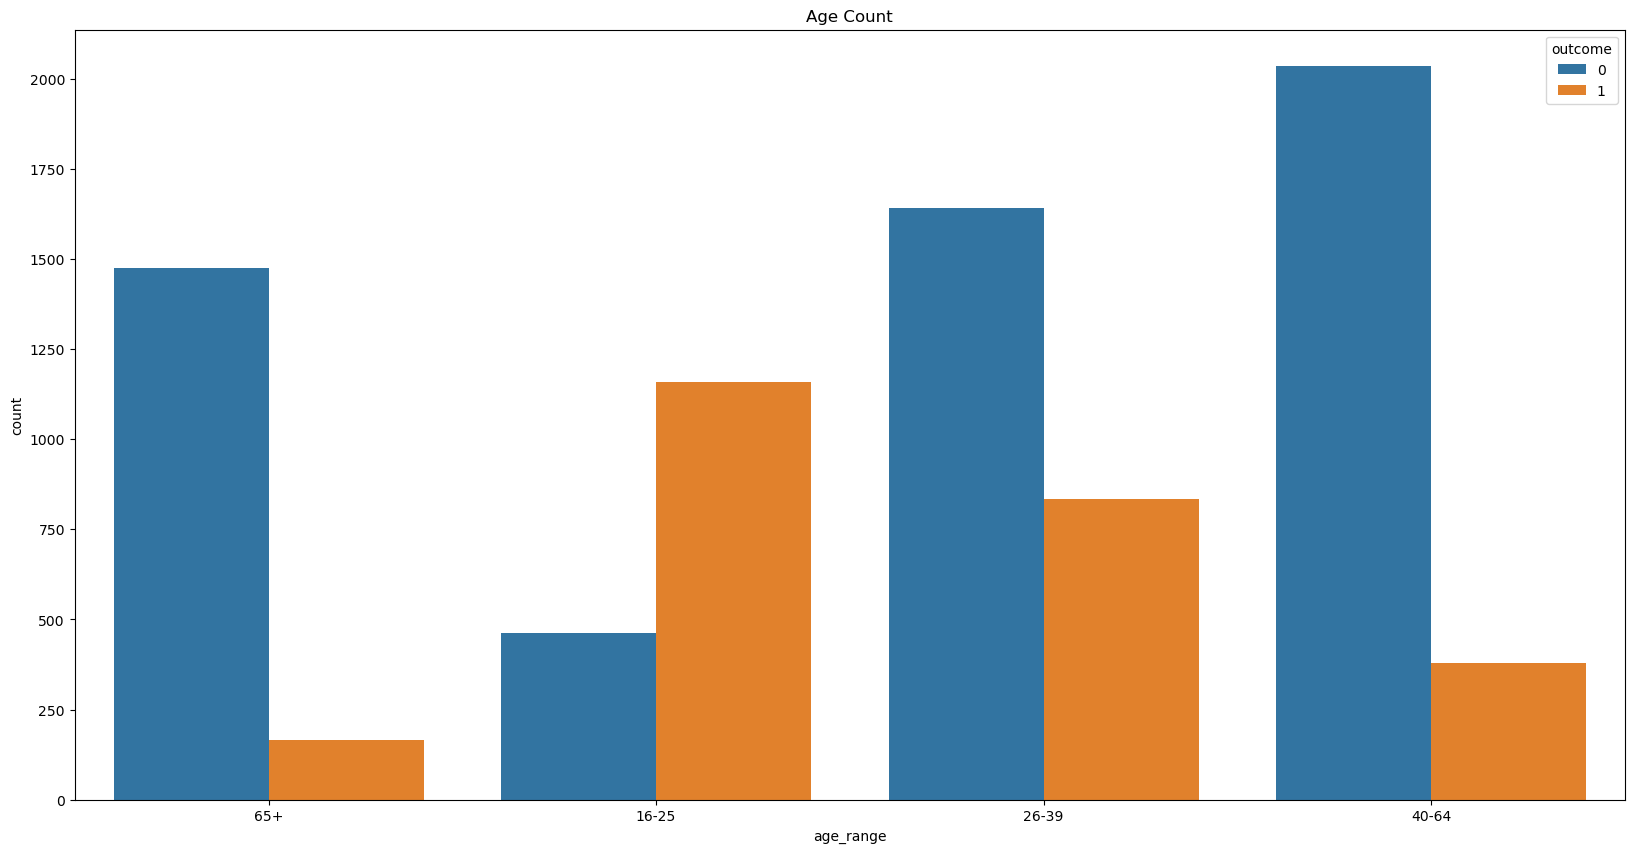

In [37]:
plt.figure(figsize=(20,10))
plt.title('Age Count')
sns.countplot(data=df_ins, x ='age_range',hue='outcome');

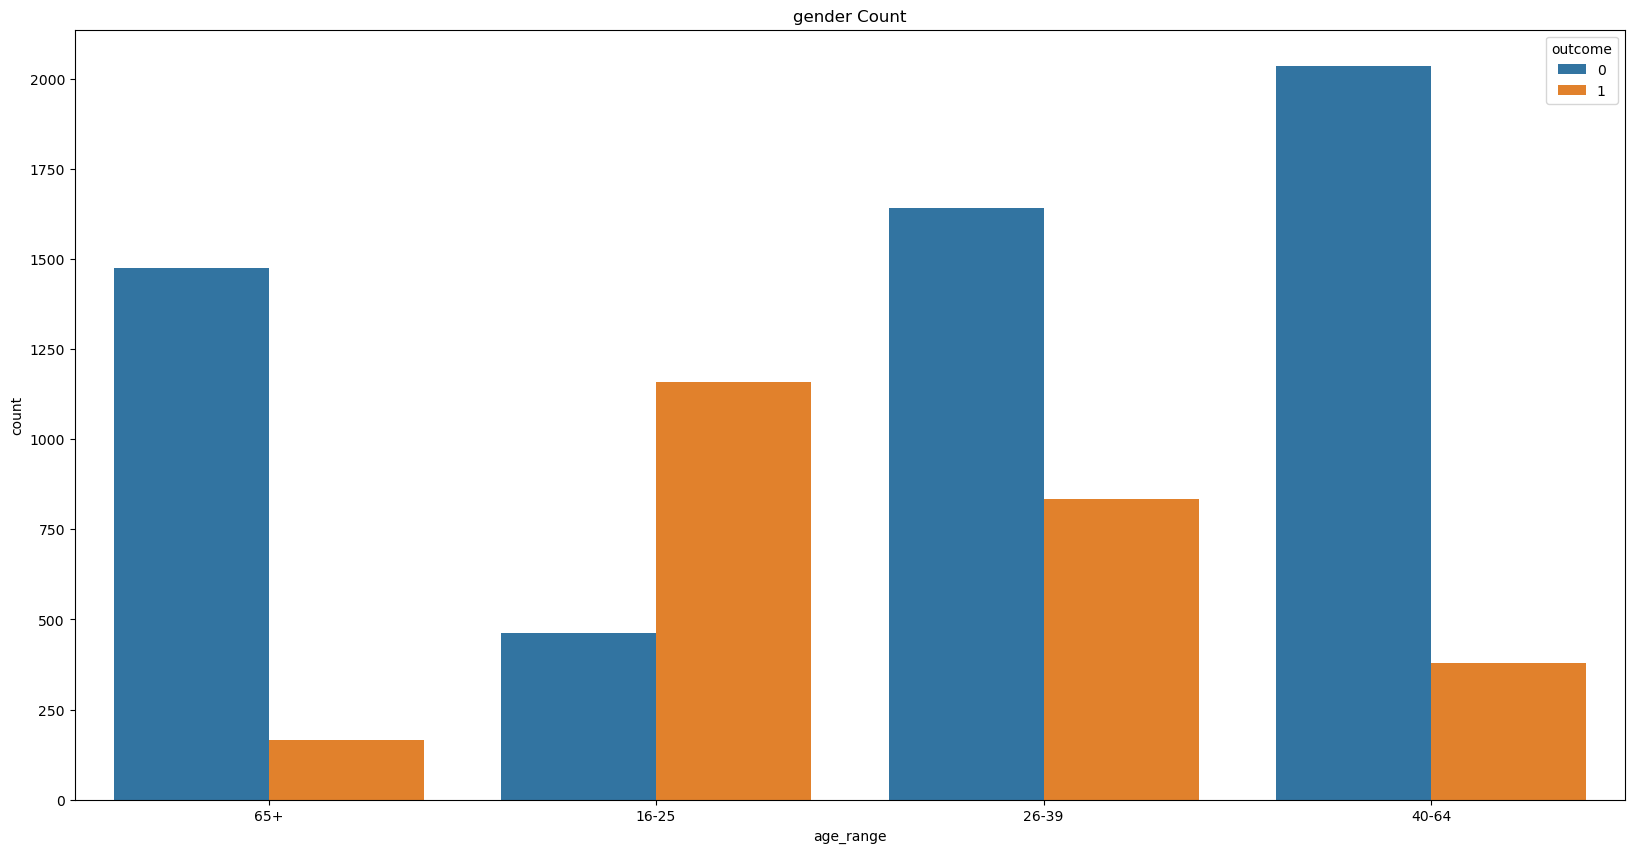

In [38]:
plt.figure(figsize=(20,10))
plt.title('gender Count')
#sns.countplot(data=df_ins, x ='age_range');
sns.countplot(data=df_ins, x='age_range', hue='outcome');

#import seaborn as sns

#sns.scatterplot(x='x', y='y', hue=['category1', 'category2'], palette=['#007bff', '#ffc107'], data=data)

In [39]:
df_ins.head(5)

,person_id,age_range,gender,majority_minority,driving_experience_years,education,income,credit_score,vehicle_ownership,vehicle_year_after_2015,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,65+,female,majority,0-9,high school,upper class,0.629027,1,True,0,1,10238,12000,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9,none,poverty,0.357757,0,True,0,0,10238,16000,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9,high school,working class,0.493146,1,True,0,0,10238,11000,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9,university,working class,0.206013,1,True,0,1,32765,11000,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19,none,working class,0.388366,1,True,0,0,32765,12000,sedan,2,0,1,1


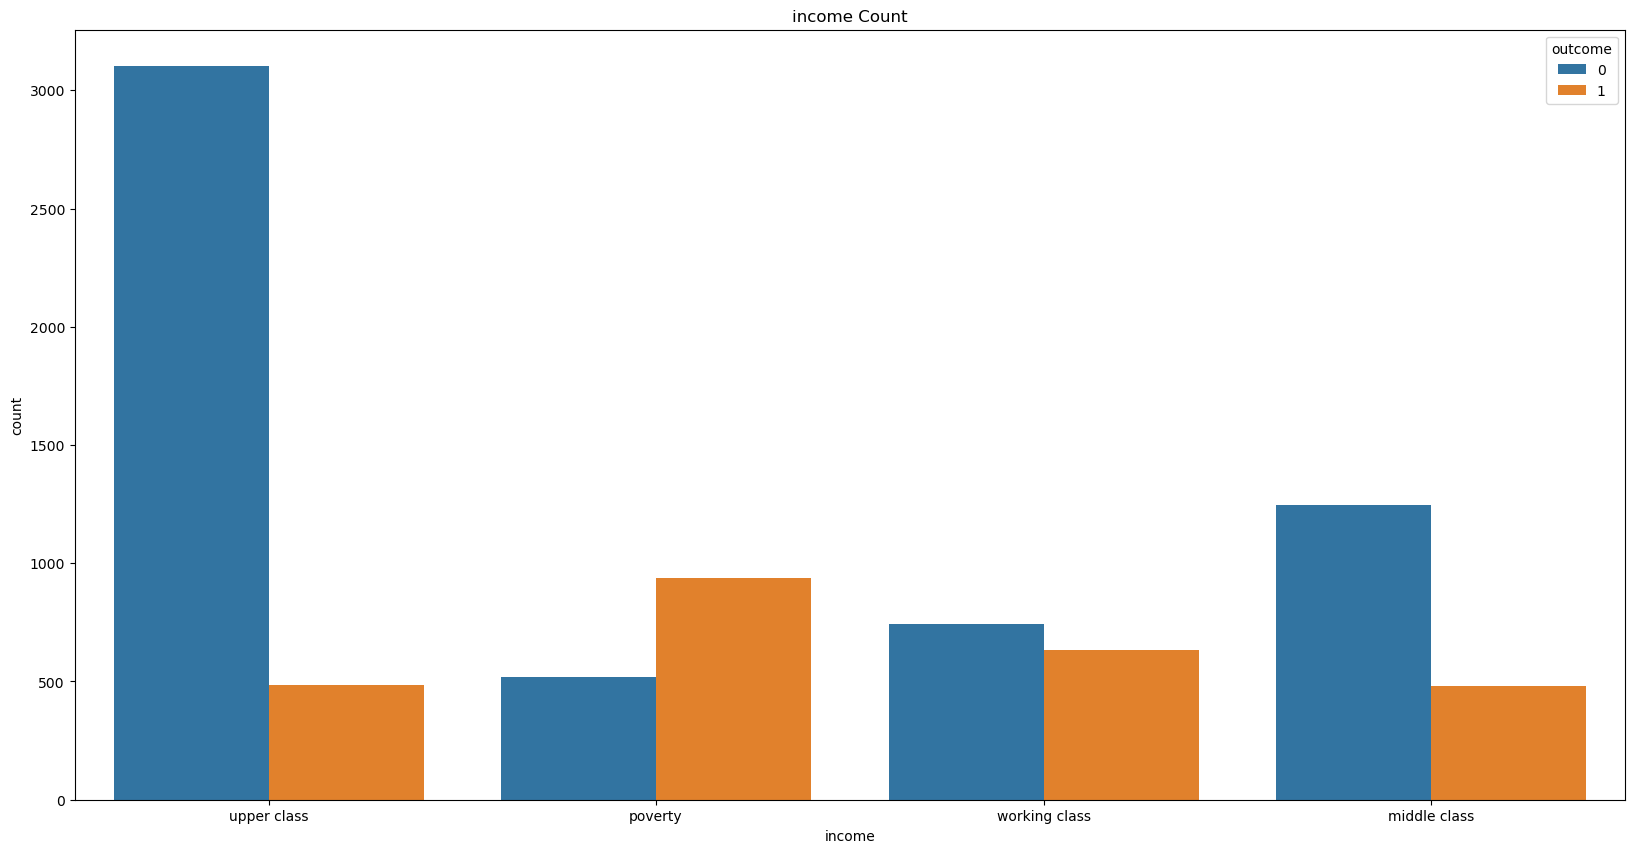

In [40]:
plt.figure(figsize=(20,10))
plt.title('income Count')
sns.countplot(data=df_ins, x ='income',hue='outcome');

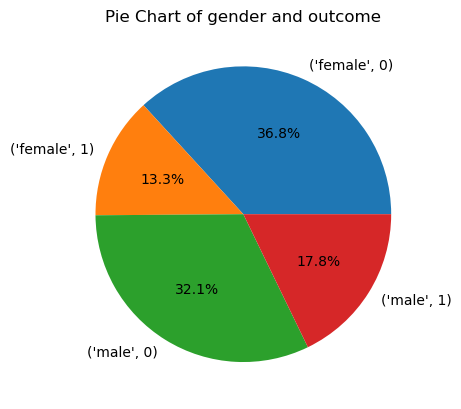

In [41]:
# Group the data by gender and outcome
grouped_data = df_ins.groupby(['gender', 'outcome'])['outcome'].count()

# Create a pie chart of the grouped data
plt.pie(grouped_data, labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Pie Chart of gender and outcome")
plt.show()

In [42]:
grouped_data = df_ins.groupby(['age_range', 'gender', 'outcome'])['outcome'].count().unstack()
grouped_data

outcome              0    1
age_range gender           
16-25     female   291  553
          male     172  605
26-39     female   890  330
          male     750  505
40-64     female  1053  140
          male     981  238
65+       female   765   62
          male     711  103

In [43]:
#Adding new column for Vehicle_id
df_ins['vehicle_id'] = 0

# create a new column 'duplicated column'
df_ins['vehicle_id'] = df_ins['person_id'].copy()

In [44]:
df_ins.dropna().shape

(8149, 20)

In [45]:
customer = df_ins[['person_id', 'vehicle_id', 'age_range', 'gender', 'majority_minority', 'education', 'income', 'married', 'children', 'postal_code'  ]]
customer.to_csv('customer.csv', index=False)

driver_information = df_ins[['person_id', 'driving_experience_years', 'credit_score', 'vehicle_ownership', 'annual_mileage' ]]
driver_information.to_csv('driver_information.csv', index=False)

In [46]:
driving_history	= df_ins[['person_id', 'speeding_violations', 'duis', 'past_accidents',  'outcome']]
driving_history.to_csv('driving_history.csv', index=False)

In [47]:
vehicle = df_ins [['vehicle_id', 'vehicle_year_after_2015', 'vehicle_type' ]]
vehicle.to_csv('vehicle.csv', index=False)

In [48]:
df_ins.dtypes

person_id                      int64
age_range                     object
gender                        object
majority_minority             object
driving_experience_years    category
education                     object
income                        object
credit_score                 float64
vehicle_ownership              int64
vehicle_year_after_2015         bool
married                        int64
children                       int64
postal_code                    int64
annual_mileage                 int64
vehicle_type                  object
speeding_violations            int64
duis                           int64
past_accidents                 int64
outcome                        int64
vehicle_id                     int64
dtype: object

In [49]:
df_ins.head(5)

,person_id,age_range,gender,majority_minority,driving_experience_years,education,income,credit_score,vehicle_ownership,vehicle_year_after_2015,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome,vehicle_id
0,569520,65+,female,majority,0-9,high school,upper class,0.629027,1,True,0,1,10238,12000,sedan,0,0,0,0,569520
1,750365,16-25,male,majority,0-9,none,poverty,0.357757,0,True,0,0,10238,16000,sedan,0,0,0,1,750365
2,199901,16-25,female,majority,0-9,high school,working class,0.493146,1,True,0,0,10238,11000,sedan,0,0,0,0,199901
3,478866,16-25,male,majority,0-9,university,working class,0.206013,1,True,0,1,32765,11000,sedan,0,0,0,0,478866
4,731664,26-39,male,majority,10-19,none,working class,0.388366,1,True,0,0,32765,12000,sedan,2,0,1,1,731664


In [50]:
df_ins['credit_score'].unique()

array([0.629027, 0.357757, 0.493146, ..., 0.47094, 0.364185, 0.435225])